<a href="https://colab.research.google.com/github/solharsh/ML_Repository_University_Of_Chicago_PGD/blob/master/Assignment1_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 1

In this assignment, you will get your feet wet with doing basic feature engineering and hypothesis testing in Python. While most students in this class don't have much experience with Python (and some don't have any), it's a pretty intuitive language to learn, and the Workshops in each module offer examples of most things that you are be asked to do in this and future assignments.

If you get lost, or the Workshops don't demonstrate something that you need to do, there's a wealth of help available. If you know the function you are trying to use, and can't get it to work, consult the documentation! Otherwise, try Googling your problem, or checking Stack Overflow. One of the skills that you should get out of this course is learning to leverage the knowledge and solutions that are already out there to achieve your own goals.

Finally, your instructor, TA, and fellow students are also resources--post questions to the Discussion area for help.

## Part 1: Feature Engineering
The file "nyc-rolling-sales_clean.csvPreview the document" contains New York City property sales data taken from Kaggle (Links to an external site.). The data has already been cleaned and a few columns have been dropped.

Write your own code in Python that performs the following operations on this dataset:

Create a new column "year of sale" by extracting year information from "SALE DATE" column.
Drop the "SALE DATE" column.
Get dummy encoded columns for 'TAX CLASS AT PRESENT' predictor.
 

## Part 2: Hypothesis Testing
The file "gestational_study.csvPreview the document" contains data from a small study involving 17 infants on the relationship between gestational age at birth (measured in weeks) and birth weight (measured in grams).

Write your own code in Python that performs the following operations on this dataset:

Calculate the correlation between Gestational Age and Birth Weight (use the corr() function in Pandas to calculate the correlation).
Generate a scatter plot to visualize the relationships between these two variables. Does the scatter plot confirm the correlation value you calculated? Does there seem to be a strong correlation between the two predictors?
Perform a hypothesis test and state the confidence level at which you can confirm a correlation between the two variables (use the scipy.stats.pearsonr() function--consult the SciPy documentation for details (Links to an external site.) about its inputs and outputs).
For both parts, document your work and explain your reasoning by commenting on your code.

Upload your homework here as a Jupyter Notebook, a .ipynb file. You can also submit a second file converted to HTML (by going to file-->download as-->HTML).

Tip: to provide commentary or document your work in Jupyter Notebook, select the cell you want to turn into a comment and select "Markdown" from the dropdown: (a short cut for this is to hit the "Esc" key and pressing the "m" key)

# Part 1 : Feature Engineering

In [0]:
import pandas as pd #importing Pandas Library

df1 = pd.read_csv("/content/drive/My Drive/UC Machine Learning/Datasets/nyc-rolling-sales_clean.csv") #reading a csv file from local drive

In [3]:
df1.head() #reading the top 5 records from the dataframe

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489,18523,1920,16232000,2016-11-07 00:00:00
1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,C6,244 EAST 7TH STREET,10009,24,0,24,4131,16776,1928,11900000,2017-06-21 00:00:00
2,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,115 AVENUE C,10009,0,1,1,1218,3586,1899,3700000,2016-09-28 00:00:00
3,CHELSEA,01 ONE FAMILY DWELLINGS,1,771,52,A9,224 WEST 22ND STREET,10011,1,0,1,1975,3855,1901,7425000,2016-12-30 00:00:00
4,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011,1,0,1,1588,5653,1900,10,2017-01-30 00:00:00


a. Create a new column "year of sale" by extracting year information from "SALE DATE" column.

In [4]:
df1['SALE DATE'] = pd.to_datetime(df1['SALE DATE']) #converting "SALE DATE" type to Python Date time object

df1.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
0,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489,18523,1920,16232000,2016-11-07
1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,C6,244 EAST 7TH STREET,10009,24,0,24,4131,16776,1928,11900000,2017-06-21
2,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,115 AVENUE C,10009,0,1,1,1218,3586,1899,3700000,2016-09-28
3,CHELSEA,01 ONE FAMILY DWELLINGS,1,771,52,A9,224 WEST 22ND STREET,10011,1,0,1,1975,3855,1901,7425000,2016-12-30
4,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011,1,0,1,1588,5653,1900,10,2017-01-30


In [5]:
df1['year of sale'] = df1['SALE DATE'].dt.year #creating "year of sale" column with only year (from "SALE DATE")

df1.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,year of sale
0,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489,18523,1920,16232000,2016-11-07,2016
1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,C6,244 EAST 7TH STREET,10009,24,0,24,4131,16776,1928,11900000,2017-06-21,2017
2,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,115 AVENUE C,10009,0,1,1,1218,3586,1899,3700000,2016-09-28,2016
3,CHELSEA,01 ONE FAMILY DWELLINGS,1,771,52,A9,224 WEST 22ND STREET,10011,1,0,1,1975,3855,1901,7425000,2016-12-30,2016
4,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011,1,0,1,1588,5653,1900,10,2017-01-30,2017


b. Drop the "SALE DATE" column.

In [6]:
df1.drop(['SALE DATE'], axis=1, inplace = True) #dropping "SALE DATE" column

df1.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,year of sale
0,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489,18523,1920,16232000,2016
1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,C6,244 EAST 7TH STREET,10009,24,0,24,4131,16776,1928,11900000,2017
2,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,115 AVENUE C,10009,0,1,1,1218,3586,1899,3700000,2016
3,CHELSEA,01 ONE FAMILY DWELLINGS,1,771,52,A9,224 WEST 22ND STREET,10011,1,0,1,1975,3855,1901,7425000,2016
4,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011,1,0,1,1588,5653,1900,10,2017


c. Get dummy encoded columns for 'TAX CLASS AT PRESENT' predictor.

In [7]:
pd.get_dummies(df1, columns=['TAX CLASS AT PRESENT']).head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,year of sale,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
0,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489,18523,1920,16232000,2016,0,1,0,0
1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,376,14,C6,244 EAST 7TH STREET,10009,24,0,24,4131,16776,1928,11900000,2017,0,1,0,0
2,ALPHABET CITY,22 STORE BUILDINGS,390,34,K4,115 AVENUE C,10009,0,1,1,1218,3586,1899,3700000,2016,0,0,0,1
3,CHELSEA,01 ONE FAMILY DWELLINGS,771,52,A9,224 WEST 22ND STREET,10011,1,0,1,1975,3855,1901,7425000,2016,1,0,0,0
4,CHELSEA,01 ONE FAMILY DWELLINGS,772,29,A4,231 WEST 22ND STREET,10011,1,0,1,1588,5653,1900,10,2017,1,0,0,0


# Part 2: Hypothesis Testing

In [0]:
df2 = pd.read_csv("/content/drive/My Drive/UC Machine Learning/Datasets/gestational_study.csv", index_col = 0) #reading a csv file from local drive

In [9]:
df2.head() #reading Top 5 records 

,Gestational_Age,Birth_Weight
Infant_id,,
1,35.0,1895
2,36.0,2030
3,29.0,1440
4,40.0,2835
5,36.0,3090


a. Calculate the correlation between Gestational Age and Birth Weight (use the corr() function in Pandas to calculate the correlation).

In [10]:
df2.corr(method="pearson") #using "Pearson" methond to find the correlation

,Gestational_Age,Birth_Weight
Gestational_Age,1.000000,0.819783
Birth_Weight,0.819783,1.000000


b. Generate a scatter plot to visualize the relationships between these two variables. Does the scatter plot confirm the correlation value you calculated? Does there seem to be a strong correlation between the two predictors?

In [11]:
import matplotlib.pyplot as plt #Importing to Plot
import seaborn as sb #for statistical visualization

df2.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Gestational_Age,Birth_Weight
Infant_id,,
1,35.0,1895
2,36.0,2030
3,29.0,1440
4,40.0,2835
5,36.0,3090


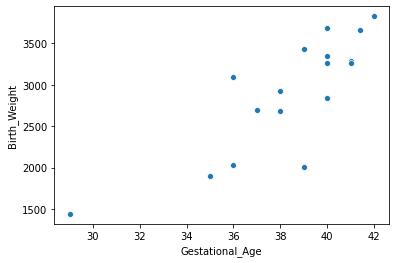

In [12]:
correlation = sb.scatterplot(x="Gestational_Age", y="Birth_Weight", data = df2)

Observation: The plot generated confirms a strong correlation between the two variables. The same can be verified by checking the R values generated through Pearson method, which are greater than 0.7 and closer to 1.

c. Perform a hypothesis test and state the confidence level at which you can confirm a correlation between the two variables (use the scipy.stats.pearsonr() function--consult the SciPy documentation for details (Links to an external site.) about its inputs and outputs).

In [0]:
from scipy import stats
from scipy.stats import pearsonr
import math



Please note, I'll be using "Null Hypothesis" and "Alternate Hypothesis" testing to check dependencies

In case of Null Hypothesis, if correlation coefficient 'c' is 0, both the columns are independent. In case of Alternate Hypothesis, if correlation coefficient 'c' is not 0, the variables are dependent. (Infact, dependency increases when'c' becomes closer to +1 or -1






Case1: For confidence level : 90%, alpha value = 0.1


In [14]:
(c, p) = pearsonr(df2["Gestational_Age"], df2["Birth_Weight"])

print ("corr coff", c)
print ("p-value", p)

if p < 0.1:
    print("Null Hypothesis rejected & Alternate Hypothesis accepted")
else:
    print("Null Hypothesis accepted & Alternate Hypothesis rejected")

corr coff 0.8197828031536365
p-value 5.621078528333726e-05
Null Hypothesis rejected & Alternate Hypothesis accepted


Case2: For confidence level : 95%, alpha value = 0.05

In [15]:
(c, p) = pearsonr(df2["Gestational_Age"], df2["Birth_Weight"])

print ("corr coff", c)
print ("p-value", p)

if p < 0.05:
    print("Null Hypothesis rejected & Alternate Hypothesis accepted")
else:
    print("Null Hypothesis accepted & Alternate Hypothesis rejected")

corr coff 0.8197828031536365
p-value 5.621078528333726e-05
Null Hypothesis rejected & Alternate Hypothesis accepted


Case3: For confidence level : 99%, alpha value = 0.01

In [16]:
(c, p) = pearsonr(df2["Gestational_Age"], df2["Birth_Weight"])

print ("corr coff", c)
print ("p-value", p)

if p < 0.01:
    print("Null Hypothesis rejected & Alternate Hypothesis accepted")
else:
    print("Null Hypothesis accepted & Alternate Hypothesis rejected")

corr coff 0.8197828031536365
p-value 5.621078528333726e-05
Null Hypothesis rejected & Alternate Hypothesis accepted
